In [46]:
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 3.4

Loading Data

In [47]:
rolls = np.load('rolls.npy')
train, validation = train_test_split(rolls, test_size=0.5, shuffle=False)

### 3.4.2

Model score:  -43179.46692410508
Model score:  -43069.07329084994
Model score:  -43063.493036103304
Model score:  -43183.99301525568
Model score:  -43188.812390745625
Model score:  -43069.298246629056
Model score:  -43182.85402701319
Model score:  -43181.51325045149
Model score:  -43187.36482170466
Model score:  -43184.347991731905

Best model score:  -43063.493036103304
Sequence:  [1 1 1 ... 0 0 0]


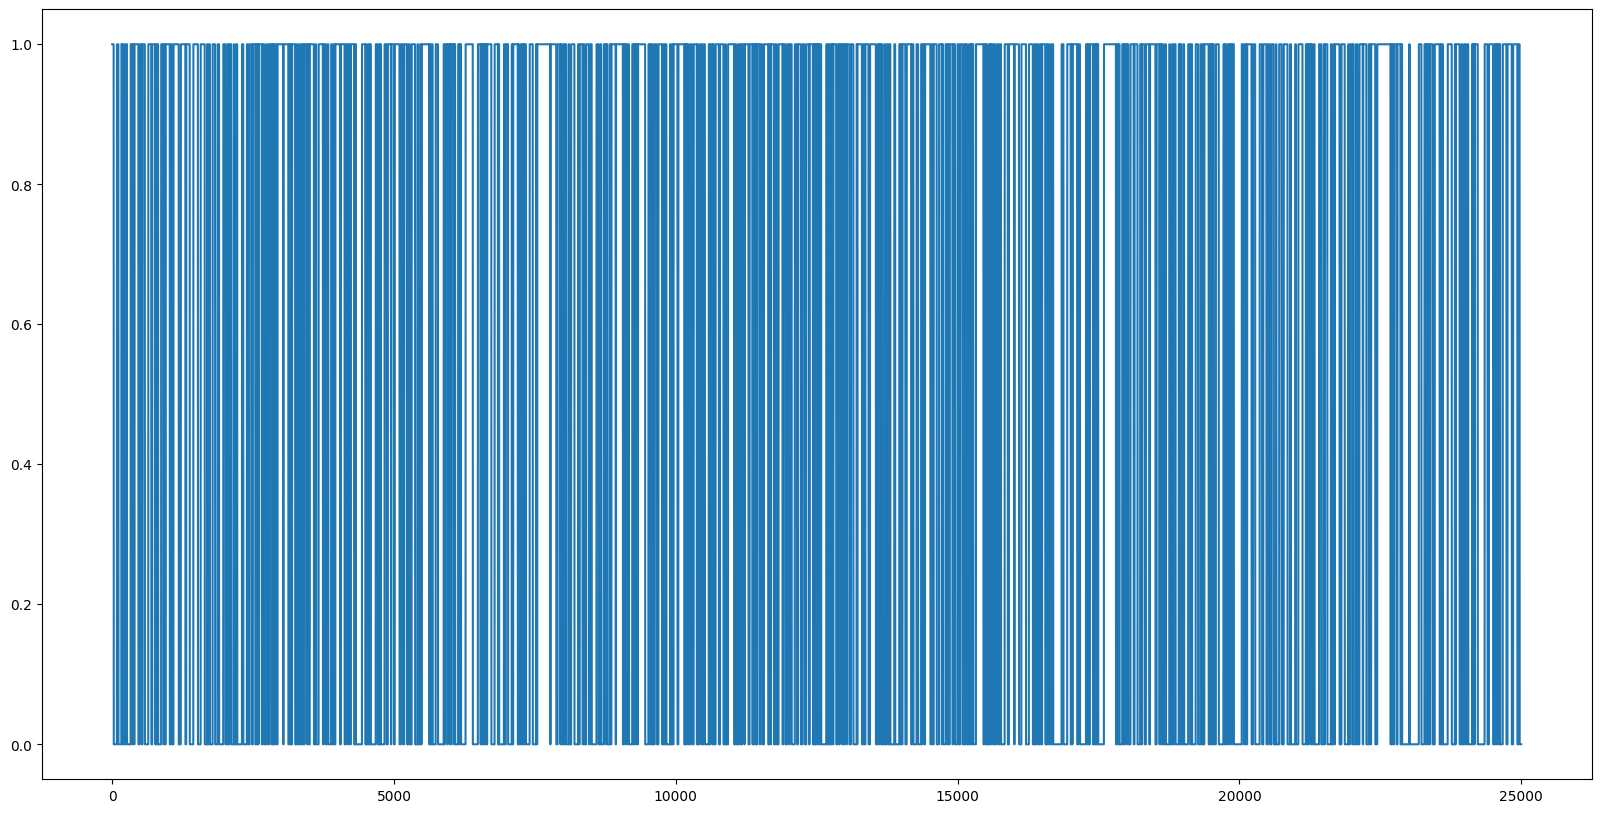

In [48]:
scores = []
models = []
startprob = np.array([0.5, 0.5])

np.random.seed(13)
for i in range(10):
    model = hmm.CategoricalHMM(n_components=2, n_iter=100, init_params='')
    model.startprob_ = startprob

    loaded = np.random.rand(6)
    loaded = loaded / loaded.sum()

    emissionprob = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], loaded])
    model.emissionprob_ = emissionprob

    transmat = np.random.rand(2, 2)
    transmat = transmat / transmat.sum(axis=1, keepdims=True)
    model.transmat_ = transmat

    model.fit(train.reshape(-1, 1))
    score = model.score(validation.reshape(-1, 1))
    print('Model score: ', score)

    scores.append(score)
    models.append(model)

print()
best_model = models[np.argmax(scores)]
print('Best model score: ', best_model.score(validation.reshape(-1, 1)))    

states = best_model.predict(validation.reshape(-1, 1))
print('Sequence: ', states)

plt.figure(figsize=(20, 10))
plt.plot(states)
plt.show()

#### This task corresponds to the EVALUATION problem in HMMs.

### 3.4.3

In [49]:
print('Transition matrix: ')
print(best_model.transmat_)

Transition matrix: 
[[0.84202369 0.15797631]
 [0.14672323 0.85327677]]


#### This task corresponds to the LEARNING problem in HMMs.

### 3.4.4

In [50]:
print('Probabilities of all the 6 faces: ') 
print(best_model.emissionprob_[1])

print('Loaded die is biased towards: ', np.argmax(best_model.emissionprob_[1]) + 1)

Probabilities of all the 6 faces: 
[0.16855254 0.15985904 0.17176302 0.16500209 0.16668632 0.168137  ]
Loaded die is biased towards:  3


#### This task corresponds to the LEARNING problem in HMMs.

## 3.5

In [51]:
runs = np.load('runs.npy')
train, validation = train_test_split(runs, test_size=0.5, shuffle=False)

In [55]:
models = []
scores = []

startprob = np.array([0.5, 0.5])
transmat = np.array([[0.7, 0.3], [0.3, 0.7]])

np.random.seed(13)
for i in range(10):
    model = hmm.CategoricalHMM(n_components=2, init_params='', n_iter=100)
    model.startprob_ = startprob

    virat = np.random.rand(7)
    virat[1] = virat[1] + 0.3
    virat[2] = virat[2] + 0.3
    virat[5] = 0
    virat = virat / virat.sum()

    rohit = np.random.rand(7)
    rohit[4] = rohit[4] + 0.3
    rohit[6] = rohit[6] + 0.3
    rohit[5] = 0
    rohit = rohit / rohit.sum()

    emissionprob = np.array([virat, rohit])
    model.emissionprob_ = emissionprob
    model.transmat_ = transmat

    model.fit(train)
    score = model.score(validation)
    print('Model score: ', score)

    scores.append(score)
    models.append(model)

Model score:  -25531.857846392715
Model score:  -25530.655173063435
Model score:  -25560.903991939675
Model score:  -25530.909209166253
Model score:  -25531.23001185544
Model score:  -25530.659313880613
Model score:  -25532.90365597934
Model score:  -25530.84695634433
Model score:  -25530.869283058117
Model score:  -25530.708315973163


In [56]:
best_model = models[np.argmax(scores)]
print('Best model score: ', best_model.score(validation))

print('Starting probabilities: ')
print(best_model.startprob_)
print()

print('Transition matrix: ')
print(best_model.transmat_)
print()

print('Probabilities of all runs: ')
print(best_model.emissionprob_)

Best model score:  -25530.655173063435
Starting probabilities: 
[1.00000000e+00 3.12187977e-41]

Transition matrix: 
[[0.5173242  0.4826758 ]
 [0.25130287 0.74869713]]

Probabilities of all runs: 
[[0.16321345 0.36906923 0.32369998 0.0456426  0.04790782 0.
  0.05046693]
 [0.1008403  0.10840066 0.10364063 0.04811248 0.3618392  0.
  0.27716673]]


In [57]:
states = best_model.predict(validation.reshape(-1, 1))

new_states = []
for s in states:
    if s == 0:
        new_states.append('K')
    else:
        new_states.append('R')

print('Sequence: ', new_states)

if new_states[0] == 'K':
    print('First ball played by Kohli')
else:
    print('First ball played by Rohit')

if new_states[-1] == 'K':
    print('Last ball played by Kohli')
else:
    print('Last ball played by Rohit')

Sequence:  ['K', 'R', 'R', 'K', 'K', 'R', 'R', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'R', 'R', 'R', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'R', 'R', 'K', 'K', 'R', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'K', 'K', 'R', 'K', 'K', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'R', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'K', 'R', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'R', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'R', 'R', 'R', 'R'